In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd=pd.read_csv('Iot Network Intrusion Dataset.csv')
pd.head()       

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [3]:
print(pd.columns)

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [46]:
final_data = pd.loc[:, ['Src_Port', 'Protocol', 'Flow_Duration', 'TotLen_Fwd_Pkts', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std','Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'ACK_Flag_Cnt','Label']]

final_data.head()


,Src_Port,Protocol,Flow_Duration,TotLen_Fwd_Pkts,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,ACK_Flag_Cnt,Label
0,10000,17,75,982.0,982.0,0.000000,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,0,Anomaly
1,2179,6,5310,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,0,Anomaly
2,52727,6,141,0.0,0.0,0.000000,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,1,Anomaly
3,52964,6,151,0.0,0.0,0.000000,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,1,Anomaly
4,36763,17,153,886.0,443.0,12.727922,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,0,Anomaly


In [47]:
final_data['Label'] = final_data['Label'].apply(lambda x: 1 if x == 'Anomaly' else 0)
final_data.head()


,Src_Port,Protocol,Flow_Duration,TotLen_Fwd_Pkts,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,ACK_Flag_Cnt,Label
0,10000,17,75,982.0,982.0,0.000000,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,0,1
1,2179,6,5310,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,0,1
2,52727,6,141,0.0,0.0,0.000000,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,1,1
3,52964,6,151,0.0,0.0,0.000000,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,1,1
4,36763,17,153,886.0,443.0,12.727922,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,0,1


In [48]:
missing_values = final_data.isnull().sum()
np.isfinite(final_data.all())
nan_values = final_data.isnull().sum()
print(nan_values)
# print(missing_values)


Src_Port            0
Protocol            0
Flow_Duration       0
TotLen_Fwd_Pkts     0
Fwd_Pkt_Len_Mean    0
Fwd_Pkt_Len_Std     0
Bwd_Pkt_Len_Mean    0
Bwd_Pkt_Len_Std     0
Flow_Byts/s         0
Flow_Pkts/s         0
Flow_IAT_Mean       0
Flow_IAT_Std        0
ACK_Flag_Cnt        0
Label               0
dtype: int64


In [49]:
flow_bytes = final_data['Flow_Byts/s']
flow_bytes.max() 


inf

In [50]:
flow_packets = final_data['Flow_Pkts/s']
flow_packets.max()

inf

In [51]:
final_data['Flow_Pkts/s'].replace([np.inf], 1e16, inplace=True)    

In [52]:
final_data['Flow_Byts/s'].replace([np.inf], 1e16, inplace=True)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Split the data into features (X) and target variable (y)
X = final_data.drop('Label', axis=1)
y = final_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [54]:
# Check for missing values
print(final_data.isnull().sum())

# Check for infinite values
print(np.isfinite(X_train).all())


Src_Port            0
Protocol            0
Flow_Duration       0
TotLen_Fwd_Pkts     0
Fwd_Pkt_Len_Mean    0
Fwd_Pkt_Len_Std     0
Bwd_Pkt_Len_Mean    0
Bwd_Pkt_Len_Std     0
Flow_Byts/s         0
Flow_Pkts/s         0
Flow_IAT_Mean       0
Flow_IAT_Std        0
ACK_Flag_Cnt        0
Label               0
dtype: int64
Src_Port            True
Protocol            True
Flow_Duration       True
TotLen_Fwd_Pkts     True
Fwd_Pkt_Len_Mean    True
Fwd_Pkt_Len_Std     True
Bwd_Pkt_Len_Mean    True
Bwd_Pkt_Len_Std     True
Flow_Byts/s         True
Flow_Pkts/s         True
Flow_IAT_Mean       True
Flow_IAT_Std        True
ACK_Flag_Cnt        True
dtype: bool


Accuracy: 0.9452447725656575
Confusion Matrix:
[[  1778   6235]
 [   618 116526]]


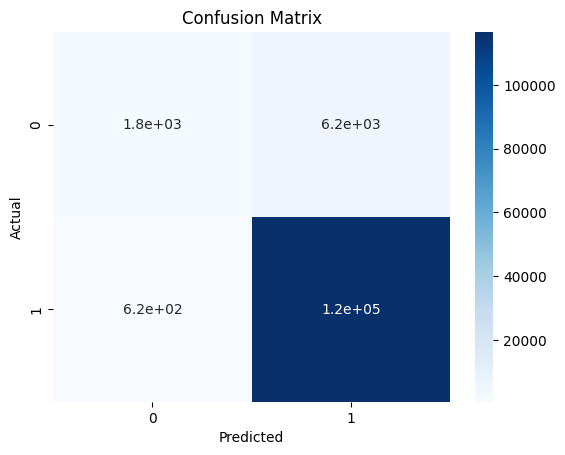

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

bernoulli_nb = BernoulliNB()

# Train the classifier on the training data
bernoulli_nb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = bernoulli_nb.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
